In [1]:
import pandas as pd, numpy as np, scipy as sp, sklearn , matplotlib.pyplot as plt, seaborn as sb,plotly as ply, statsmodels as stat, tabulate,re,nltk,keras

Using TensorFlow backend.


In [13]:
import os
os.chdir("C:\\Users\\Hi\\Documents\\UC BANA Master\\Data science - Python\\Text mining practice\\Disaster tweets - Kaggle\\nlp-getting-started")

In [14]:
raw_data = pd.read_csv("train.csv")

In [15]:
display(raw_data)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


# data cleaning

In [16]:
raw_data = raw_data[raw_data['keyword'].isnull()==False]

In [6]:
raw_data.shape

(7552, 5)

In [17]:
ids_with_target_error = [328,443,513,2619,3640,3900,4342,5781,6552,6554,6570,6701,6702,6729,6861,7226]
raw_data.loc[raw_data['id'].isin(ids_with_target_error),'target'] = 0
raw_data[raw_data['id'].isin(ids_with_target_error)]

,id,keyword,location,text,target
229,328,annihilated,NaN,Ready to get annihilated for the BUCS game,0
301,443,apocalypse,NaN,Short Reading\n\nApocalypse 21:1023 \n\nIn the...,0
356,513,army,Studio,But if you build an army of 100 dogs and their...,0
1822,2619,crashed,NaN,My iPod crashed..... \n#WeLoveYouLouis \n#MTVH...,0
2536,3640,desolation,"Quilmes , Arg",This desperation dislocation\nSeparation conde...,0
2715,3900,devastated,PG Chillin!,Man Currensy really be talkin that talk... I'd...,0
3024,4342,dust%20storm,chicago,Going to a fest? Bring swimming goggles for th...,0
4068,5781,forest%20fires,NaN,Campsite recommendations \nToilets /shower \nP...,0
4609,6552,injury,Saint Paul,My prediction for the Vikings game this Sunday...,0
4611,6554,injury,NaN,Dante Exum's knee injury could stem Jazz's hop...,0


# Text tokenization

In [18]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

In [19]:
tknzr = TweetTokenizer(strip_handles=True)
stop_words = set(stopwords.words('english'))
corpus = []

## Text sanitation

In [20]:
def clean_data(text):
    # special characters
    text = re.sub(r"\x89Û_", "", text)
    text = re.sub(r"\x89ÛÒ", "", text)
    text = re.sub(r"\x89ÛÓ", "", text)
    text = re.sub(r"\x89ÛÏWhen", "When", text)
    text = re.sub(r"\x89ÛÏ", "", text)
    text = re.sub(r"China\x89Ûªs", "China's", text)
    text = re.sub(r"let\x89Ûªs", "let's", text)
    text = re.sub(r"\x89Û÷", "", text)
    text = re.sub(r"\x89Ûª", "", text)
    text = re.sub(r"\x89Û\x9d", "", text)
    text = re.sub(r"å_", "", text)
    text = re.sub(r"\x89Û¢", "", text)
    text = re.sub(r"\x89Û¢åÊ", "", text)
    text = re.sub(r"fromåÊwounds", "from wounds", text)
    text = re.sub(r"åÊ", "", text)
    text = re.sub(r"åÈ", "", text)
    text = re.sub(r"JapÌ_n", "Japan", text)    
    text = re.sub(r"Ì©", "e", text)
    text = re.sub(r"å¨", "", text)
    text = re.sub(r"SuruÌ¤", "Suruc", text)
    text = re.sub(r"åÇ", "", text)
    text = re.sub(r"å£3million", "3 million", text)
    text = re.sub(r"åÀ", "", text)
    
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    
    # remove numbers
    text = re.sub(r'[0-9]', '', text)
    
    # remove punctuation and special chars (keep '!')
    for p in string.punctuation.replace('!', ''):
        text = text.replace(p, '')
        
    # remove urls
    text = re.sub(r'http\S+', '', text)
    
    # tokenize
    text = tknzr.tokenize(text)
    
    # remove stopwords
    text = [w.lower() for w in text if not w in stop_words]
    corpus.append(text)
    
    # join back
    text = ' '.join(text)
    
    return text

In [21]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
     "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [22]:
def convert_abbrev_in_text(text):
    t=[]
    words=text.split()
    t = [abbreviations[w.lower()] if w.lower() in abbreviations.keys() else w for w in words]
    return ' '.join(t) 

In [23]:
raw_data['text']=raw_data['text'].apply(clean_data)
raw_data['text']=raw_data['text'].apply(convert_abbrev_in_text)

In [24]:
def short_word_removal(s):
    wordlist = s.split()
    s2 = ' '.join(w for w in wordlist if len(w) >3)
    return s2

raw_data['text'] = raw_data['text'].apply(short_word_removal)

In [15]:
display(raw_data.head(100))

,id,keyword,location,text,target
31,48,ablaze,Birmingham,bbcmtd wholesale markets ablaze,1
32,49,ablaze,Est. September 2012 - Bristol,always bring heavy metal retweet,0
33,50,ablaze,AFRICA,africanbaze breaking newsnigeria flag ablaze,1
34,52,ablaze,"Philadelphia, PA",crying ablaze,0
35,53,ablaze,"London, UK",plus side look last night ablaze,0
...,...,...,...,...,...
126,182,aftershock,304,thing stands dream belief actually possible jo...,0
127,183,aftershock,marysville ca,praise ministry tells like wdyouth biblestudy,0
128,184,aftershock,304,remembering going best know avoid trap thinkin...,0
129,185,aftershock,"Hermosa Beach, CA",tried orange aftershock today life never,0


In [35]:
# !pip install tensorflow

  Using cached https://files.pythonhosted.org/packages/34/d5/ce8c17971067c0184c9045112b755be5461d5ce5253ef65a367e1298d7c5/tensorflow-2.1.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/b2/49/2233e63052d5686c72131b579837ddfb98ba9dd0b92bb91efcb441ada8ce/opt_einsum-3.2.0-py3-none-any.whl
  Found existing installation: setuptools 40.8.0
    Uninstalling setuptools-40.8.0:
      Successfully uninstalled setuptools-40.8.0


## Tokenizer

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding,Bidirectional,Dropout,BatchNormalization,GlobalMaxPool1D,Input
# from keras.layers import Embedding, Input, Dense, CuDNNGRU,Bidirectional, Dropout,SpatialDropout1D, Conv1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [21]:
raw_data.shape

(7552, 5)

In [26]:
train_data = raw_data.copy()

In [27]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(train_data['text'])

In [70]:
tokenizer.word_docs

defaultdict(int,
            {'bbcmtd': 1,
             'ablaze': 28,
             'wholesale': 4,
             'markets': 7,
             'heavy': 19,
             'metal': 12,
             'always': 45,
             'retweet': 105,
             'bring': 17,
             'africanbaze': 1,
             'breaking': 37,
             'newsnigeria': 1,
             'flag': 21,
             'crying': 9,
             'plus': 8,
             'night': 50,
             'side': 22,
             'look': 73,
             'last': 80,
             'phdsquares': 1,
             'much': 61,
             'doubt': 5,
             'mufc': 2,
             'season': 14,
             'hype': 3,
             'acquisitions': 2,
             'built': 3,
             'theyve': 5,
             'around': 39,
             'office': 12,
             'inec': 2,
             'abia': 2,
             'barbados': 1,
             'head': 49,
             'jamaica': 5,
             'cars': 20,
             'santa': 6,
   

In [28]:
word_index = tokenizer.word_index

In [31]:
print(word_index)

{'like': 1, 'fire': 2, 'people': 3, 'dont': 4, 'news': 5, 'video': 6, 'emergency': 7, 'time': 8, 'disaster': 9, 'police': 10, 'would': 11, 'this': 12, 'still': 13, 'body': 14, 'back': 15, 'burning': 16, 'crash': 17, 'know': 18, 'storm': 19, 'loud': 20, 'suicide': 21, 'california': 22, 'prime': 23, 'buildings': 24, 'retweet': 25, 'minister': 26, 'first': 27, 'cant': 28, 'going': 29, 'world': 30, 'nuclear': 31, 'bomb': 32, 'fires': 33, 'youtube': 34, 'love': 35, 'attack': 36, 'dead': 37, 'killed': 38, 'good': 39, 'train': 40, 'full': 41, 'today': 42, 'hiroshima': 43, 'life': 44, 'families': 45, 'accident': 46, 'think': 47, 'watch': 48, 'many': 49, 'last': 50, 'could': 51, 'years': 52, 'want': 53, 'what': 54, 'make': 55, 'more': 56, 'work': 57, 'home': 58, 'laughing': 59, 'collapse': 60, 'when': 61, 'look': 62, 'best': 63, 'help': 64, 'please': 65, 'need': 66, 'city': 67, 'even': 68, 'death': 69, 'take': 70, 'mass': 71, 'wildfire': 72, 'really': 73, 'army': 74, 'youre': 75, 'year': 76, 'a

In [32]:
max_words = max(word_index.values())
print(max_words)

15521


In [29]:
sequences = tokenizer.texts_to_sequences(train_data['text'])
pad=pad_sequences(sequences,maxlen=120,padding='post',truncating='post')

In [30]:
# print(sequences)
print(pad)

[[ 5724  2372  1553 ...     0     0     0]
 [  152   758   675 ...     0     0     0]
 [ 5725   260  5726 ...     0     0     0]
 ...
 [ 5615  5614  1726 ...     0     0     0]
 [15521    91  4604 ...     0     0     0]
 [ 1726  1727   470 ...     0     0     0]]


In [20]:
pad.shape

(7552, 120)

# Split train test

In [22]:
partition=int(len(train_data)*0.8);
y_train=train_data['target'].iloc[0:partition]
y_val=train_data['target'].iloc[partition:len(train_data)]
x_train=pad[0:partition]
x_val=pad[partition:len(train_data)]

vocab_size=len(tokenizer.word_index)+1

In [23]:
print('X train shape: ', x_train.shape,' y train shape: ',y_train.shape)

X train shape:  (6041, 120)  y train shape:  (6041,)


In [25]:
print(vocab_size)

15522


In [24]:
print(x_train)

[[5724 2372 1553 ...    0    0    0]
 [ 152  758  675 ...    0    0    0]
 [5725  260 5726 ...    0    0    0]
 ...
 [ 210 1723 1020 ...    0    0    0]
 [  51  920  210 ...    0    0    0]
 [ 606  210 1732 ...    0    0    0]]


# Model architecture

## Test input and outputs of different layers - Rough

In [78]:
import keras

In [28]:
Embedding?

model.compile('rmsprop', 'mse')
output_array = model.predict(input_array)
assert output_array.shape == (32, 10, 64)

In [44]:
model = Sequential()
model.add(Embedding(vocab_size, 32, input_length=pad.shape[1]))
model.compile('rmsprop', 'mse')
# tt = model.predict(x_train)

NameError: name 'model' is not defined

In [71]:
keras.backend.clear_session()
del model

model = Sequential()
model.add(Embedding(vocab_size, 32, input_length=pad.shape[1]))
model.add(LSTM(20,return_sequences=True))
# model.add(Dropout(0.7))

model.add(LSTM(20))
# model.add(Dropout(0.7))

# model.add(Bidirectional(LSTM(32)))
# # model.add(Dropout(0.7))

model.compile('rmsprop',loss = 'binary_crossentropy')

# tt = model.output
# print(tt.shape)
# print(tt)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 32)           496704    
_________________________________________________________________
lstm (LSTM)                  (None, 120, 20)           4240      
_________________________________________________________________
lstm_1 (LSTM)                (None, 20)                3280      
Total params: 504,224
Trainable params: 504,224
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.output

<tf.Tensor 'dropout_8/Identity:0' shape=(None, 120, 64) dtype=float32>

## Actual model begins here

In [81]:
#after clear_data function is used 
model = Sequential()
model.add(Embedding(vocab_size, 32, input_length=pad.shape[1]))
model.add(Bidirectional(LSTM(32,return_sequences=True)))
model.add(Dropout(0.7))

model.add(Bidirectional(LSTM(32,return_sequences=True)))
model.add(Dropout(0.7))

model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.7))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(x_train, y_train, epochs=3, validation_data=(x_val, y_val))

Train on 6041 samples, validate on 1511 samples
Epoch 1/3
6041/6041 [==============================] - 53s 9ms/sample - loss: 0.6754 - accuracy: 0.5833 - val_loss: 0.5675 - val_accuracy: 0.7095
Epoch 2/3
6041/6041 [==============================] - 43s 7ms/sample - loss: 0.5041 - accuracy: 0.7979 - val_loss: 0.5018 - val_accuracy: 0.7617
Epoch 3/3
6041/6041 [==============================] - 59s 10ms/sample - loss: 0.3051 - accuracy: 0.9025 - val_loss: 0.5853 - val_accuracy: 0.7492


In [91]:
y_val_pred=model.predict(x_val)

print(y_val_pred.shape)  # do np.ravel(y_val_pred) for comparison with y_val, otherwise convert y_val into a (1511,1)
print(y_val.shape)  

(1511, 1)
(1511,)


In [83]:
y_val_pred

array([[0.96190476],
       [0.8551734 ],
       [0.4866374 ],
       ...,
       [0.0992073 ],
       [0.29553187],
       [0.09150361]], dtype=float32)

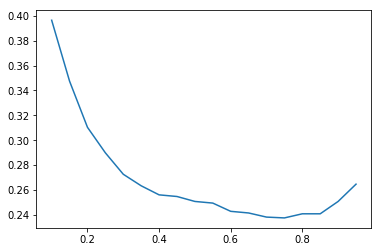

In [94]:
#probability cutoff based on misclassification

def symm_misclassif(predicted_prob,observed_y,p): 
    FP = np.sum((predicted_prob>p) & (observed_y==0)) 
    FN = np.sum((predicted_prob<=p) & (observed_y==1)) 
    misclassification = FP+FN 
    misclassification_rate = misclassification/observed_y.shape[0] 
    return misclassification_rate

prob_array = np.around(np.arange(0.1,1,0.05), decimals=2) 
misclassification_array = np.zeros(prob_array.size) 
i=0 
for p in prob_array: 
    misclassification_array[i] = symm_misclassif(np.ravel(y_val_pred),y_val,p) 
    i=i+1 
plt.plot(prob_array,misclassification_array)

In [ ]:
#follow this link for test prediction: https://www.kaggle.com/janvichokshi/disaster-tweets-cleaning-lstm-and-embedding

# Rough

In [74]:
import numpy as np
row, col = 1000, 300
X = np.random.randint(2, size=(row,col))
y = np.random.randint(2,size=(row,1))
print(X.shape)
print(y.shape)

(1000, 300)
(1000, 1)


In [85]:
X_inp = np.reshape(X,(1000,300,1))


In [81]:
keras.backend.clear_session()
del model

model = Sequential()
model.add(LSTM(1,input_shape=(300,1),return_sequences=True))
model.add(LSTM(1))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer='adam',loss = 'binary_crossentropy')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 300, 1)            12        
_________________________________________________________________
lstm_1 (LSTM)                (None, 1)                 12        
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [86]:
result = model.fit(X_inp, y,epochs=10,batch_size=64,validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 8s 10ms/sample - loss: 0.6932 - val_loss: 0.6938
Epoch 2/10
800/800 [==============================] - 3s 4ms/sample - loss: 0.6932 - val_loss: 0.6936
Epoch 3/10
800/800 [==============================] - 3s 4ms/sample - loss: 0.6931 - val_loss: 0.6938
Epoch 4/10
800/800 [==============================] - 3s 4ms/sample - loss: 0.6931 - val_loss: 0.6940
Epoch 5/10
800/800 [==============================] - 3s 4ms/sample - loss: 0.6931 - val_loss: 0.6942
Epoch 6/10
800/800 [==============================] - 5s 6ms/sample - loss: 0.6932 - val_loss: 0.6942
Epoch 7/10
800/800 [==============================] - 4s 6ms/sample - loss: 0.6931 - val_loss: 0.6946
Epoch 8/10
800/800 [==============================] - 4s 4ms/sample - loss: 0.6931 - val_loss: 0.6946
Epoch 9/10
800/800 [==============================] - 4s 5ms/sample - loss: 0.6931 - val_loss: 0.6944
Epoch 10/10
800/800 [==============

In [87]:
y_pred=model.predict(X_inp)

In [88]:
y_pred.shape

(1000, 1)

In [89]:
print(y_pred)

[[0.495512  ]
 [0.4957226 ]
 [0.49550405]
 [0.49556816]
 [0.49571487]
 [0.495741  ]
 [0.49554327]
 [0.4957464 ]
 [0.49574125]
 [0.49565735]
 [0.49592647]
 [0.49589968]
 [0.49574277]
 [0.49568126]
 [0.49575442]
 [0.4955744 ]
 [0.49567598]
 [0.49566355]
 [0.49557137]
 [0.49570772]
 [0.49579397]
 [0.49561793]
 [0.495638  ]
 [0.49538723]
 [0.4955346 ]
 [0.4956323 ]
 [0.49562502]
 [0.495784  ]
 [0.49567726]
 [0.49587357]
 [0.49561718]
 [0.49569127]
 [0.49577746]
 [0.49581426]
 [0.49566883]
 [0.49567112]
 [0.49569777]
 [0.49543005]
 [0.4954242 ]
 [0.49574125]
 [0.49571973]
 [0.49569905]
 [0.4957147 ]
 [0.49563733]
 [0.49555397]
 [0.49585575]
 [0.495762  ]
 [0.49575529]
 [0.49572998]
 [0.49563074]
 [0.49572623]
 [0.49581373]
 [0.4958262 ]
 [0.49585176]
 [0.49558824]
 [0.4954949 ]
 [0.49572554]
 [0.49582985]
 [0.4957488 ]
 [0.49568388]
 [0.4955332 ]
 [0.49545136]
 [0.49571207]
 [0.49557412]
 [0.4958849 ]
 [0.4958081 ]
 [0.49591613]
 [0.4957512 ]
 [0.49584064]
 [0.49575892]
 [0.49552384]
 [0.49

## GloVe

In [4]:
os.chdir("C:\\Users\\Hi\\Downloads\\glove.6B")

In [8]:
embeddings_index = {}
f = open('glove.6B.100d.txt',encoding="utf8")


In [9]:
# Parse the unzipped text file and create a word - vector mapping index. 
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [33]:
# Create an embedding matrix
embedding_dim = 100


embedding_matrix = np.zeros((max_words, embedding_dim))    # max words is defined in the tokenizer step before
for word, i in word_index.items():                         # word_index is created in the tokenizer step before
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [34]:
print(embedding_matrix)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.2687      0.81708002  0.69896001 ... -0.40110001  0.74656999
   0.31121999]
 [-0.26872    -0.15542001 -0.23565    ...  0.49344     0.72114003
  -0.041749  ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.71877998 -0.079608   -0.21757001 ...  0.39598    -0.59564
  -0.29644999]]
